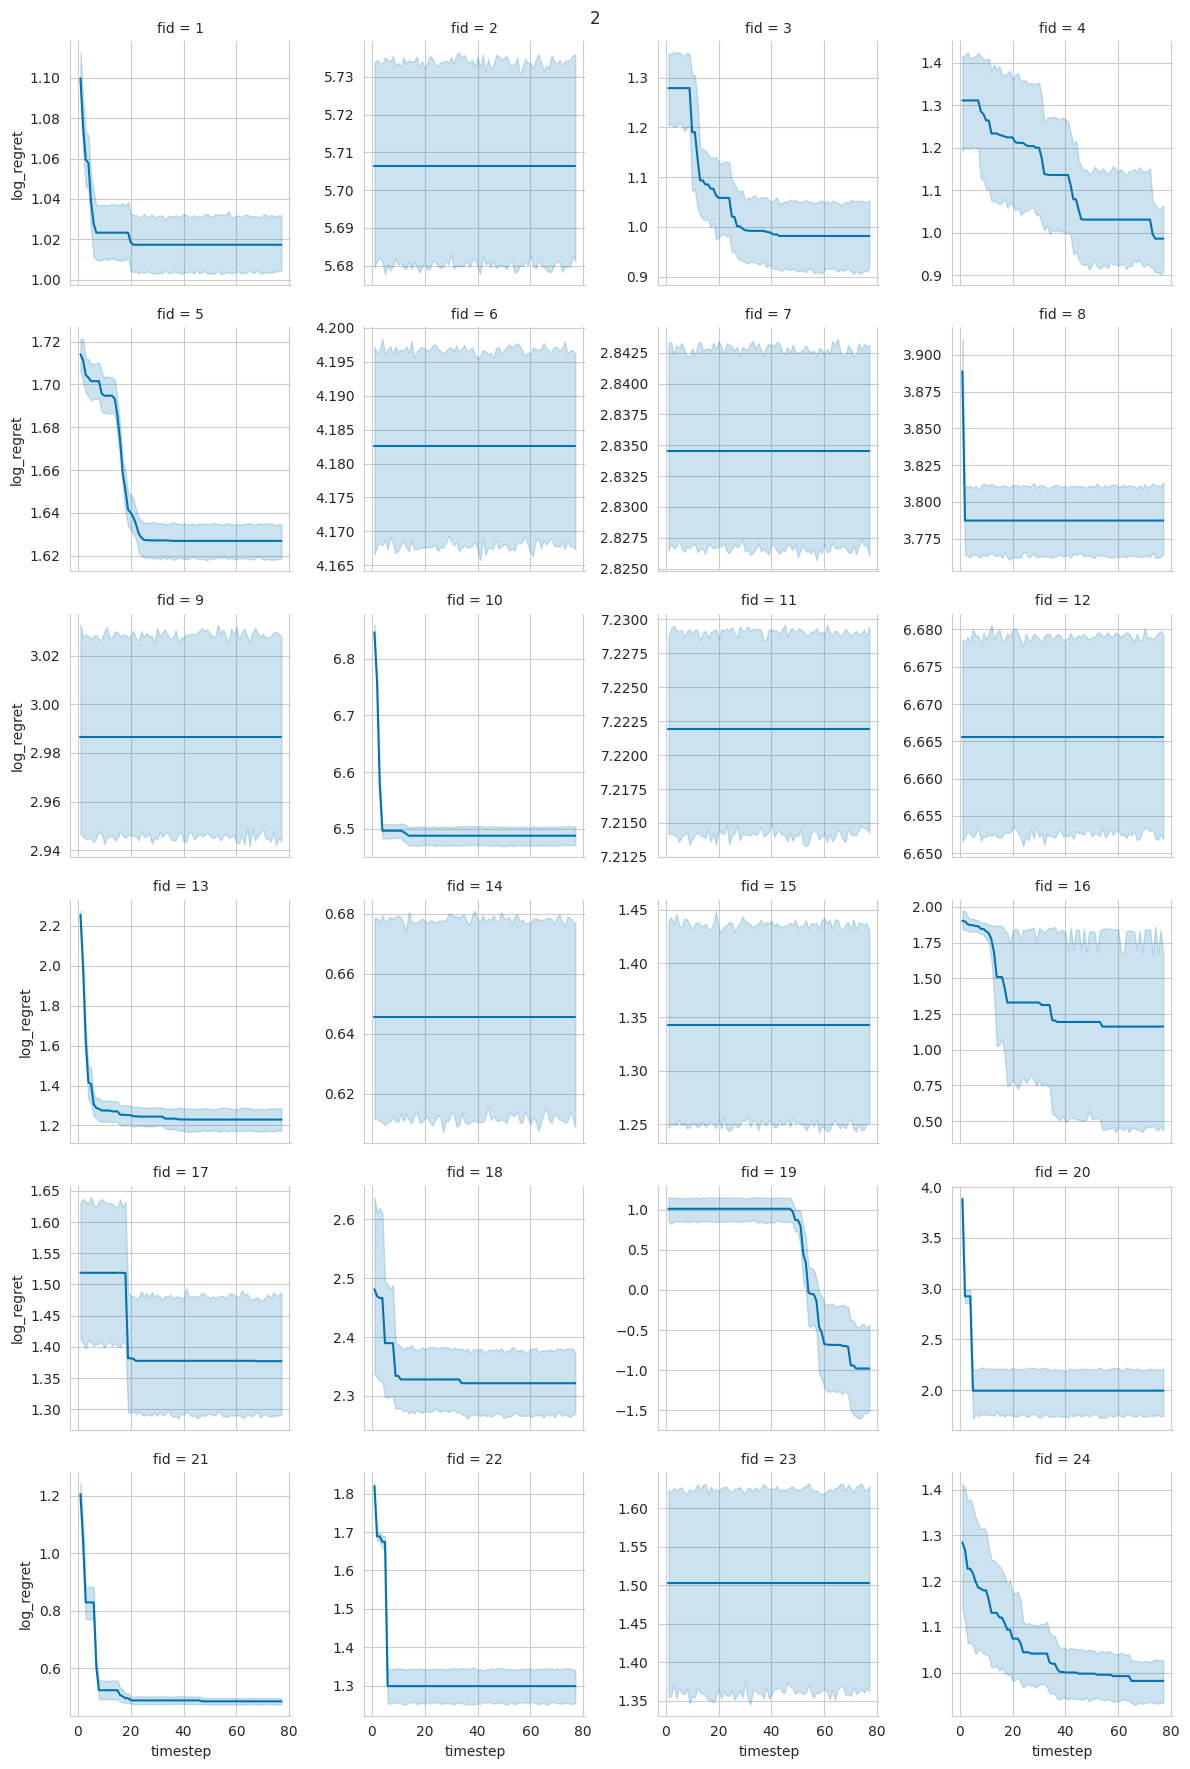

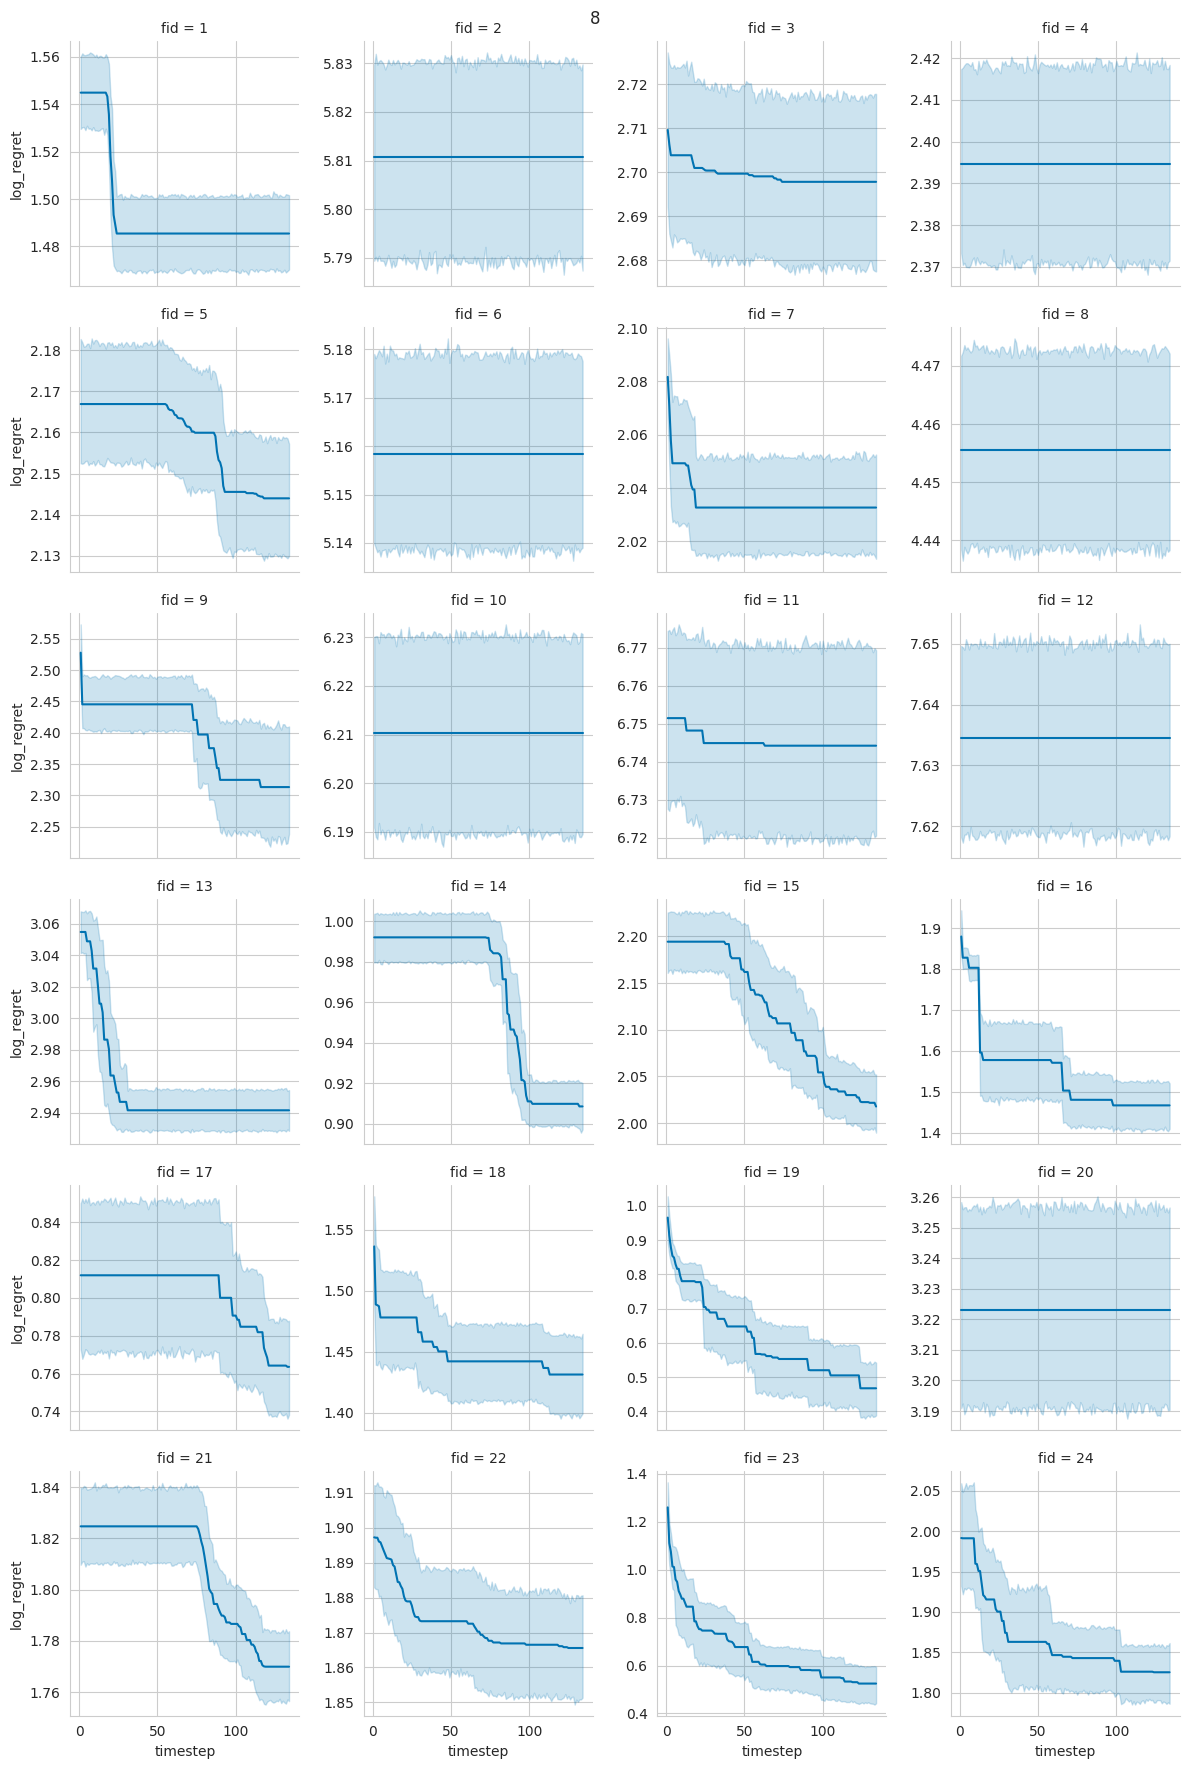

In [5]:
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
import seaborn as sns
import pandas as pd
from dacboenv.utils.math import safe_log10

setup_seaborn()

df = pd.read_csv("/scratch/hpc-prf-intexml/tklenke/repos/MetaBO/bbob_old/log/merged_rewards_per_timestep.csv")
key_performance = "log_regret"
df[key_performance] = df["reward"].map(safe_log10)

for dim, gdf in df.groupby("dim"):
    grid = sns.FacetGrid(data=gdf, col="fid", col_wrap=4, sharey=False)
    grid.map_dataframe(sns.lineplot, x="timestep", y=key_performance)
    grid.figure.suptitle(dim)
    grid.tight_layout()
    plt.show()

